In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# new import statements
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score

# Classification 2

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [3]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety
82,5.8,2.7,1,1.2,False,versicolor
134,6.1,2.6,1,1.4,False,virginica
114,5.8,2.8,1,2.4,False,virginica
42,4.4,3.2,1,0.2,True,setosa
109,7.2,3.6,1,2.5,False,virginica
57,4.9,2.4,1,1.0,False,versicolor
1,4.9,3.0,1,0.2,True,setosa
70,5.9,3.2,1,1.8,False,versicolor
25,5.0,3.0,1,0.2,True,setosa
84,5.4,3.0,1,1.5,False,versicolor


### Review: models
- Model 1: Predict petal width 
    - regression problem
- Model 2 - part a: Predict whether flower is "setosa"
    - classification problem, specifically binary classification: True / False
- Model 2 - part b: Predict probablity of flower being "setosa"
    - classification problem, probablity between 0 to 1

In [4]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# 1. initialize model
cls_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
cls_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["setosa_predictions"] = cls_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,setosa_predictions
82,5.8,2.7,1,1.2,False,versicolor,False
134,6.1,2.6,1,1.4,False,virginica,False
114,5.8,2.8,1,2.4,False,virginica,False
42,4.4,3.2,1,0.2,True,setosa,True
109,7.2,3.6,1,2.5,False,virginica,False
57,4.9,2.4,1,1.0,False,versicolor,False
1,4.9,3.0,1,0.2,True,setosa,True
70,5.9,3.2,1,1.8,False,versicolor,False
25,5.0,3.0,1,0.2,True,setosa,True
84,5.4,3.0,1,1.5,False,versicolor,False


### Model 3: Predict variety of flower

- classification problem, specifically multi-class classification for `variety`

In [5]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

# 1. initialize model
mult_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
mult_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["variety_predictions"] = mult_model.predict(test[xcols])
test

,sepal length (cm),sepal width (cm),const,petal width (cm),setosa,variety,setosa_predictions,variety_predictions
82,5.8,2.7,1,1.2,False,versicolor,False,versicolor
134,6.1,2.6,1,1.4,False,virginica,False,virginica
114,5.8,2.8,1,2.4,False,virginica,False,versicolor
42,4.4,3.2,1,0.2,True,setosa,True,setosa
109,7.2,3.6,1,2.5,False,virginica,False,virginica
57,4.9,2.4,1,1.0,False,versicolor,False,versicolor
1,4.9,3.0,1,0.2,True,setosa,True,setosa
70,5.9,3.2,1,1.8,False,versicolor,False,versicolor
25,5.0,3.0,1,0.2,True,setosa,True,setosa
84,5.4,3.0,1,1.5,False,versicolor,False,versicolor


What is the accuracy?

In [6]:
mult_model.score(test[xcols], test[ycol])

0.9

##### Math behind model 3: how does it predict?

In [7]:
mult_model.coef_

array([[-1.80097204,  3.01989635,  0.69404974],
       [ 0.64875706, -1.46308696,  1.04354373],
       [ 1.15221498, -1.55680939, -1.73759347]])

In [8]:
# taking transpose and assigning values to c
c = mult_model.coef_.T
c

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

Each column contains coefficients for scoring a different `variety`.

In [9]:
c.shape # 3 varities

(3, 3)

How can we determine name of each `variety`? 

#### `<model object>.classes_`

- ndarray containing label for each class.
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [10]:
mult_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [11]:
# assign X
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

Extracting "setosa" co-efficients.

In [12]:
# we need a 2-D array
setosa_c = mult_model.coef_.T[:, [0]]
setosa_c

array([[-1.80097204],
       [ 3.01989635],
       [ 0.69404974]])

Let's use Linear Algebra to do the prediction just for "setosa" `y = X @ c`.

In [13]:
X @ setosa_c

array([[-1.59786793],
       [-2.44014918],
       [-1.2958783 ],
       [ 2.43344109],
       [-1.40132207],
       [-0.88296201],
       [ 0.9289758 ],
       [-0.26801696],
       [ 0.7488786 ],
       [ 0.02848978]])

Repeating for other varities.

In [14]:
# versicolor scores
versicolor_c = mult_model.coef_.T[:, [1]] 
X @ versicolor_c

array([[ 0.85599987],
       [ 1.19693568],
       [ 0.70969118],
       [-0.78380349],
       [ 0.44748149],
       [ 0.71104461],
       [-0.16680757],
       [ 0.1893321 ],
       [-0.10193186],
       [ 0.15757096]])

In [15]:
# virginica scores
virginica_c = mult_model.coef_.T[:, [2]] 
X @ virginica_c

array([[ 0.74186806],
       [ 1.24321349],
       [ 0.58618712],
       [-1.6496376 ],
       [ 0.95384058],
       [ 0.1719174 ],
       [-0.76216824],
       [ 0.07868487],
       [-0.64694674],
       [-0.18606075]])

#### Review: how does `MATRIX @ vertical vector` work?

- MATRIX (data) @ vertical vector (coef) gets computed using the below LOOP:
    - For each DATA ROW of MATRIX
        - ROW (horizontal) @ c (vertical)

#### How does `MATRIX 1 @ MATRIX 2` work?

- MATRIX 1 (data) @ MATRIX 2 (coef) gets computed using the below NESTED LOOP:
    - For each DATA ROW of MATRIX 1
        - For each COEFFICIENT COLUMN of MATRIX 2
            - compute the vector @ vector (dot product)
            
Computing all predictions.            

In [16]:
# all varities
c = mult_model.coef_.T
X @ c
# Largest score determines the classification prediction output

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [17]:
test["variety_predictions"]

82     versicolor
134     virginica
114    versicolor
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
Name: variety_predictions, dtype: object

### `max`, `argmax` methods on `np.array` 

- `max`: returns max value
- `argmax`: returns index of the max value
- same idea for min, argmin

In [18]:
a = np.array([1, 2, 9, 8, 7])
a.max()

9

In [19]:
a.argmax()

2

Let's convert `X @ c` to actual label predictions.

In [20]:
# gives the index of tha max value
(X @ c).argmax()

9

In [21]:
# we want max of each row
(X @ c).argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [22]:
mult_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

`<model obj>.classes_` can return labels given a list of indices.

In [23]:
mult_model.classes_[[0, 1, 2, 0, 1, 2]]

array(['setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica'], dtype=object)

Putting `argmax` and `classes_` together.

In [24]:
mult_model.classes_[(X @ c).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [25]:
pd.Series(mult_model.classes_[(X @ c).argmax(axis=1)])

0    versicolor
1     virginica
2    versicolor
3        setosa
4     virginica
5    versicolor
6        setosa
7    versicolor
8        setosa
9    versicolor
dtype: object

In [26]:
test["variety_predictions"]

82     versicolor
134     virginica
114    versicolor
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
Name: variety_predictions, dtype: object

### Review: LinearRegression visualization

- recall that we would draw a "fit line" to visualize how well LinearRegression performs when there is only one input feature (X)
    - it was hard to draw a visualization when we had more than one input features (X)

### Visualize Decision Boundaries

- we can draw something called "decision boundaries" to visualization how well LogisticRegression performs when we only hae two labels, that is binary classification (model 2)

<div>
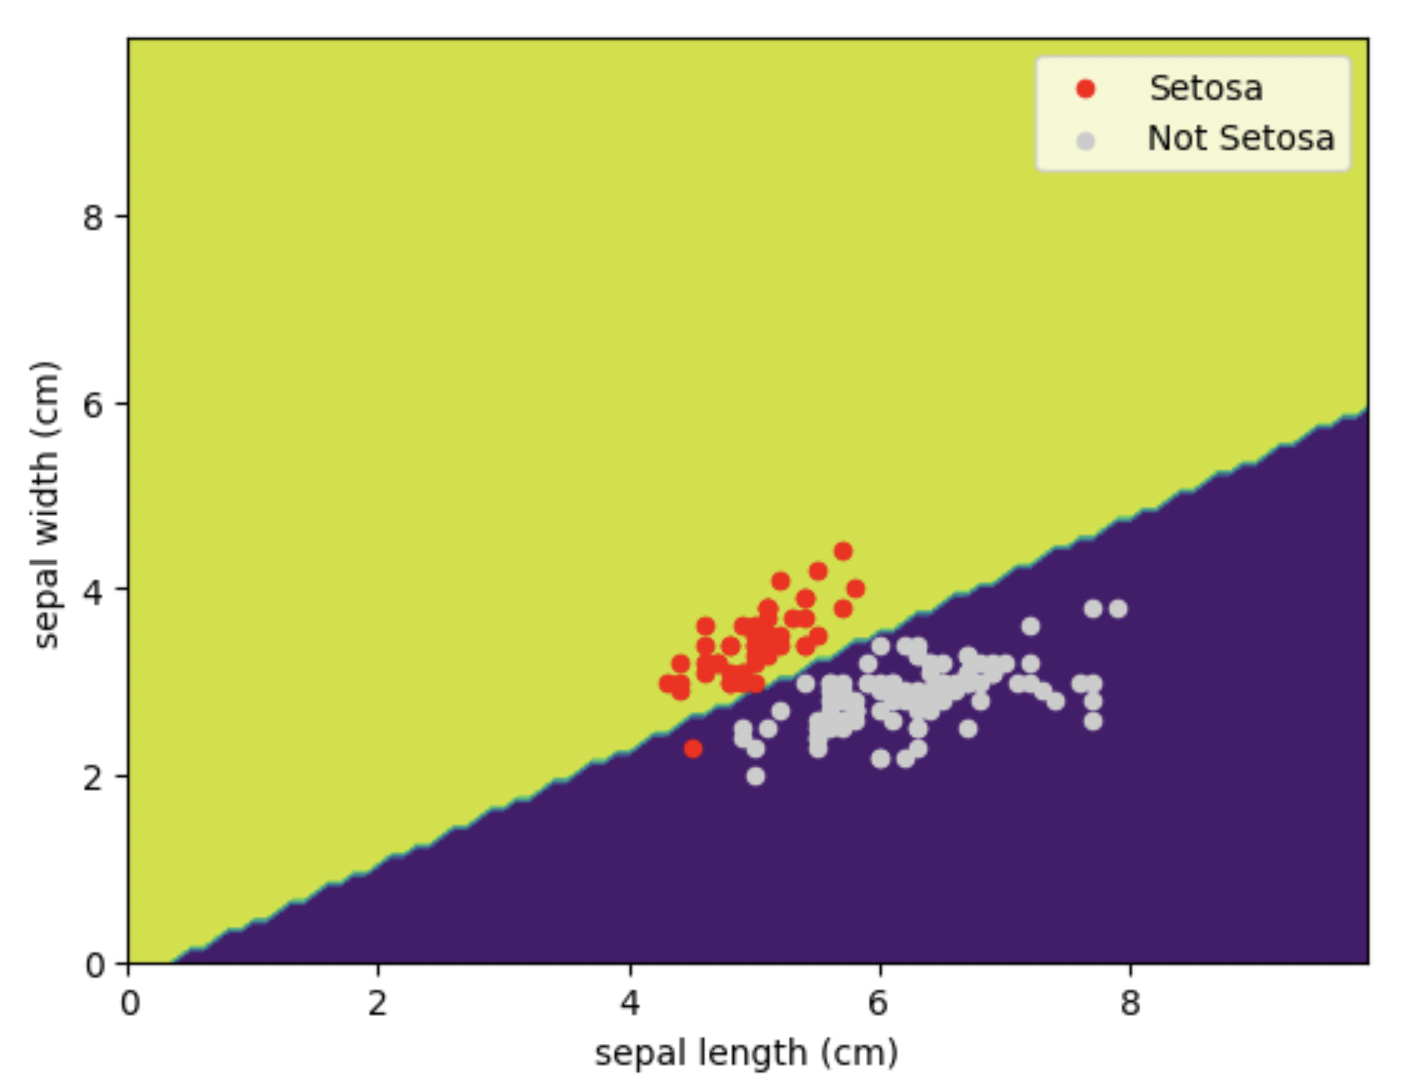
</div>

Recall that we can use `np.arange` to generate a range of numbers.

In [27]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### `np.meshgrid(x1, x2, ...)`

- Make N-D coordinate arrays given one-dimensional coordinate arrays x1, x2,…, xn.
- Returns an array of arrays.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [28]:
X, Y = np.meshgrid(np.arange(10), np.arange(10))

In [29]:
# in each cell, the number is the x-coordinate of that position
X 

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [30]:
# in each cell, the number is the y-coordinate of that position
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]])

#### `Z = F(X, Y)`, where `F(X, Y) = X * Y`

In [31]:
Z = X * Y    
Z

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

### Contour visualizations

- enables us to visualize a 3-D structure like a mountain using 2-D visualization
- example: https://en.wikipedia.org/wiki/Contour_line#/media/File:Contour2D.svg
- for classification result:
    - we have True / False
    - so we will have a contour that has two plateaus:
        - a higher plateau for True
        - a lower plateau for False
    - x and y-coordinates will be the input features
        
### `plt.contourf(X, Y, Z, levels=<num>)`

- enables us to produce contour lines and filled contours
    - larger the number => brighter the color
- `levels`: determines the number and positions of the contour lines / regions
- documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html

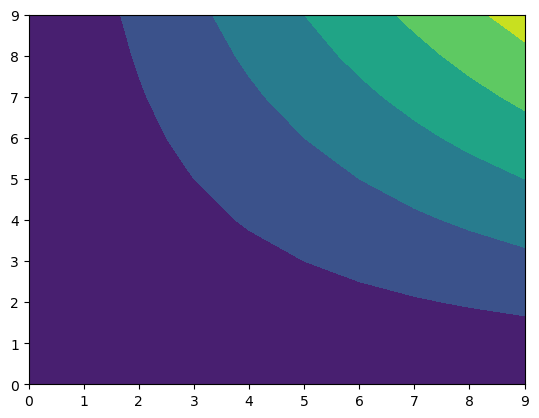

In [32]:
plt.contourf(X, Y, Z)

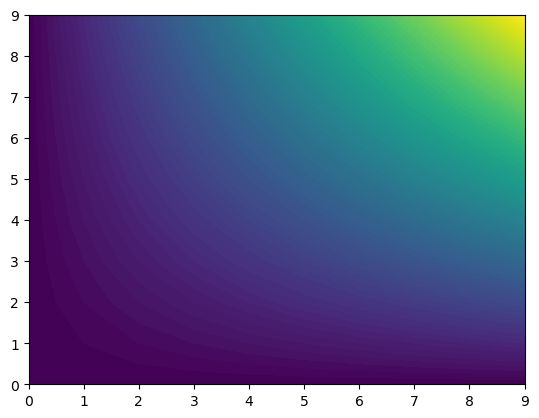

In [33]:
# higher granularity
plt.contourf(X, Y, Z, levels=100)

In [34]:
cls_model

LogisticRegression(fit_intercept=False)

In [35]:
df[xcols]

,sepal length (cm),sepal width (cm),const
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


In [36]:
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
sepl

array([[0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       ...,
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9]])

#### `predictions = F(sepl, sepw)`

In [37]:
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})
predict_df.head()

,sepal length (cm),sepal width (cm),const
0,0.0,0.0,1
1,0.1,0.0,1
2,0.2,0.0,1
3,0.3,0.0,1
4,0.4,0.0,1


In [38]:
Z_predictions = cls_model.predict(predict_df)
Z_predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [39]:
print(sepl.shape)
print(sepw.shape)
print(Z_predictions.shape)

(100, 100)
(100, 100)
(10000,)


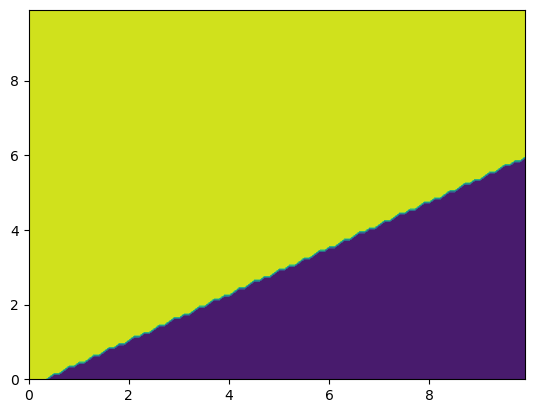

In [40]:
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

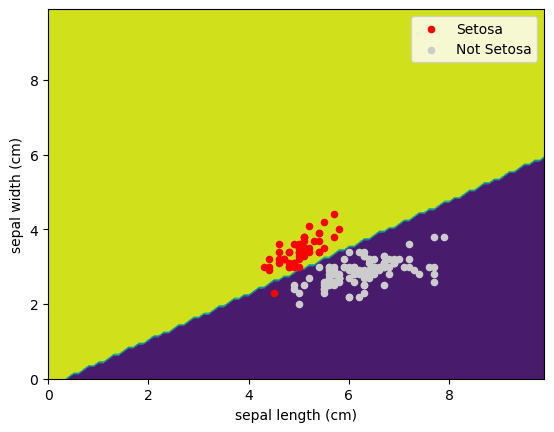

In [41]:
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()   # get current axes subplot
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax,
                              color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, 
                               color="0.8", label="Not Setosa")

#### Visualizing Multiple-classification Boundaries

In [42]:
classes_ = list(mult_model.classes_)
classes_

['setosa', 'versicolor', 'virginica']

In [43]:
classes_.index("versicolor")

1

In [44]:
predictions = np.array([classes_.index(name) for name in mult_model.predict(predict_df)])
predictions

array([1, 1, 1, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

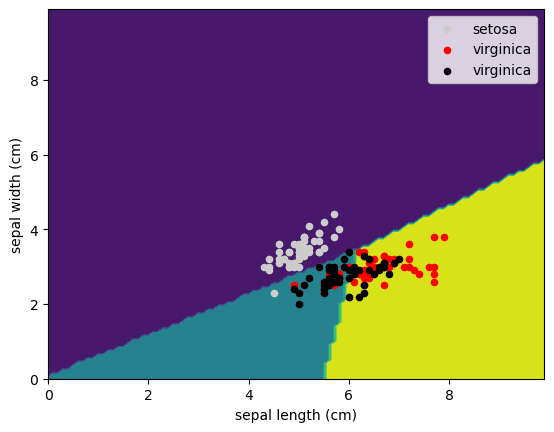

In [45]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="virginica", color="k")

#### Can we do better by creating a `Pipeline` of `PolynomialFeatures` and `LogisticRegression` models?

In [46]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=10, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=10, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

In [47]:
sepl, sepw = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
predict_df = pd.DataFrame({
    'sepal length (cm)': sepl.reshape(-1),
    'sepal width (cm)': sepw.reshape(-1),
    'const': 1
})
Z_predictions = model.predict(predict_df)
Z_predictions

array([ True,  True,  True, ...,  True,  True,  True])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

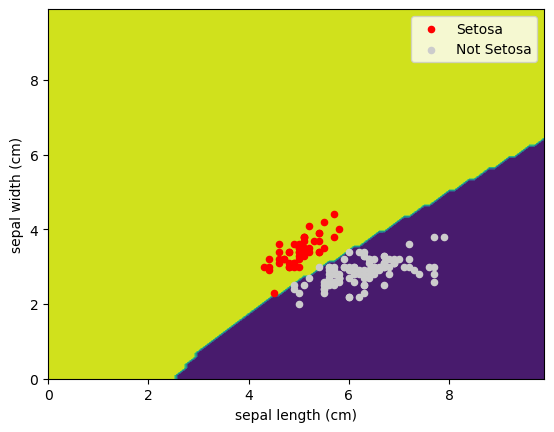

In [48]:
plt.contourf(sepl, sepw, Z_predictions.reshape(sepl.shape))
ax = plt.gca()
df[df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax,
                              color="r", label="Setosa")
df[~df["setosa"]].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, 
                               color="0.8", label="Not Setosa")

In [49]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False)),
])
model.fit(train[xcols], train[ycol])

/Users/msyamkumar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False))])

#### LogisticRegression uses an "iterative algorithm"

- chooses some random coefficients
- LOOP (some fixed number of iterations/"epochs")
    - tweaks the coefficients to get slightly better accuracy
    - if accuarcy isn't improving much:
        - exit the loop early

#### Solution 1: increase number of iterations

In [50]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=1000)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('lr', LogisticRegression(fit_intercept=False, max_iter=1000))])

In [51]:
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

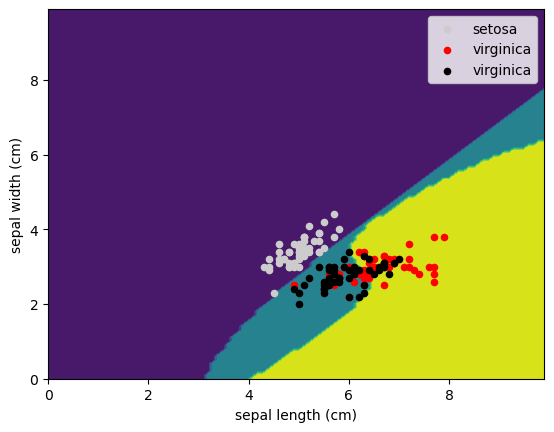

In [52]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="virginica", color="k")

#### Solution 2: Transform the data into something LogisticRegression can learn from more quickly

- LogisticRegression likes data that is standardized:
    1. "small" numbers
    2. "centered" numbers (average of the column is 0)

In [53]:
a = np.array([1, 2, 8, 9])
a

array([1, 2, 8, 9])

In [54]:
a - a.mean()

array([-4., -3.,  3.,  4.])

In [55]:
a / 10

array([0.1, 0.2, 0.8, 0.9])

In [56]:
a / a.std()

array([0.28284271, 0.56568542, 2.2627417 , 2.54558441])

In [57]:
# LogisticRegression would like to learn from a column of data that looks like this
(a - a.mean()) / a.std()

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

### `StandardScaler`

In [58]:
StandardScaler().fit_transform(a.reshape(-1, 1))

array([[-1.13137085],
       [-0.84852814],
       [ 0.84852814],
       [ 1.13137085]])

#### Recommendations: 

1. Always use StandardScaler with LogisticRegression
2. PolynomialFeatures should be BEFORE StandardScaler (when using both)

In [59]:
# solution 2: use StandardScaler
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

model = Pipeline([
    ("pf", PolynomialFeatures(degree=5, include_bias=False)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression(fit_intercept=False, max_iter=100)),
])
model.fit(train[xcols], train[ycol])

Pipeline(steps=[('pf', PolynomialFeatures(degree=5, include_bias=False)),
                ('std', StandardScaler()),
                ('lr', LogisticRegression(fit_intercept=False))])

In [60]:
predictions = np.array([classes_.index(name) for name in model.predict(predict_df)])
predictions

array([0, 0, 0, ..., 0, 0, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

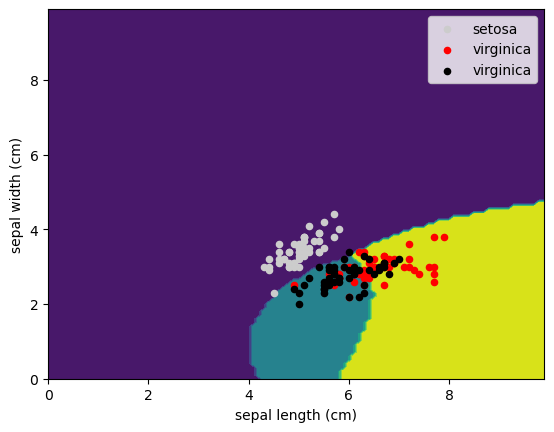

In [61]:
plt.contourf(sepl, sepw, predictions.reshape(sepl.shape))
ax = plt.gca() # get current axes
df[df["variety"] == "setosa"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="setosa", color="0.8")
df[df["variety"] == "virginica"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="virginica", color="r")
df[df["variety"] == "versicolor"].plot.scatter(x="sepal length (cm)", y="sepal width (cm)", ax=ax, label="virginica", color="k")

In [62]:
a

array([1, 2, 8, 9])

In [63]:
scaled = (a - a.mean()) / a.std()   # like StandardScaler
scaled

array([-1.13137085, -0.84852814,  0.84852814,  1.13137085])

In [64]:
scaled ** 2   # like PolynomialFeatures

array([1.28, 0.72, 0.72, 1.28])

### Scoring and Metrics

- https://scikit-learn.org/0.15/modules/model_evaluation.html

In [65]:
# pattern: positive => True, negative => False
df = pd.DataFrame([
    [15, True],
    [-2, False],
    [99, True],
    [-10, False],
    [8, True],
    [5, True],
    [-1000, False],
    [-1, False],
], columns=["x", "y"])
train, test = df.iloc[:4], df.iloc[4:]

In [66]:
train

,x,y
0,15,True
1,-2,False
2,99,True
3,-10,False


In [67]:
test

,x,y
4,8,True
5,5,True
6,-1000,False
7,-1,False


In [68]:
# TODO: 
# 1. train a LogisticRegression on training data
# 2. score the model on the test data
model = LogisticRegression()
model.fit(train[["x"]], train["y"])
model.predict(test[["x"]])

array([ True, False, False, False])

In [69]:
# by default, this uses accuracy_score
model.score(test[["x"]], test["y"])   

0.75

In [70]:
# simple example
accuracy_score(["A", "B"], ["A", "C"])

0.5

In [71]:
accuracy_score(test["y"], model.predict(test[["x"]]))

0.75

#### Confusion Matrices

In [72]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "mouse", "mouse"]
predicted = ["dog", "dog", "dog", "cat", "cat", "dog", "cat", "mouse", "mouse"]

In [73]:
# ROW: an actual category
# COL: a prediction
confusion_matrix(actual, predicted)

array([[2, 1, 0],
       [1, 3, 0],
       [0, 0, 2]])

In [74]:
labels = ["dog", "cat", "mouse", "horse"]
cm = confusion_matrix(actual, predicted, labels=labels)
cm

array([[3, 1, 0, 0],
       [1, 2, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]])

In [75]:
pd.DataFrame(cm, index=labels, columns=labels)

,dog,cat,mouse,horse
dog,3,1,0,0
cat,1,2,0,0
mouse,0,0,2,0
horse,0,0,0,0


#### Multi-Class Metrics

In [76]:
actual =    ["dog", "dog", "dog", "dog", "cat", "cat", "cat", "cat", "mouse", "mouse"] * 199
predicted = ["dog", "dog", "dog", "dog", "cat", "dog", "cat", "dog", "mouse", "mouse"] * 199
actual += ["horse"] * 10
predicted += ["dog"] * 9 + ["horse"]

labels = ["dog", "cat", "mouse", "horse"]
cm = confusion_matrix(actual, predicted, labels=labels)
cm = pd.DataFrame(cm, index=labels, columns=labels)
cm

,dog,cat,mouse,horse
dog,796,0,0,0
cat,398,398,0,0
mouse,0,0,398,0
horse,9,0,0,1


In [77]:
# what is the recall for cat?
cm.at["cat", "cat"] / cm.loc["cat", :].sum()

0.5